In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df_India=pd.read_csv('.\\Spotify dataframes\\df_india.csv' )
df_India.head()

,artist,artist popularity,name,popularity,valence,danceability,modes
0,Shae Gill,66,Pasoori,85,0.669,0.714,0
1,Shubh,68,NO LOVE,82,0.733,0.771,0
2,Sidhu Moose Wala,80,295,82,0.432,0.557,0
3,AP Dhillon,74,Excuses,82,0.494,0.837,0
4,Charlie Puth,83,Left and Right (Feat. Jung Kook of BTS),94,0.719,0.881,1


In [3]:
df_Mexico=pd.read_csv('.\\Spotify dataframes\\df_mexico.csv' )
df_Mexico.head()

,artist,artist popularity,name,popularity,valence,danceability,modes
0,Martín Vizcarra,0,Mi Bebito Fiu Fiu,0,0.677,0.742,0
1,Lasso,67,Ojos Marrones,81,0.720,0.809,0
2,Kate Bush,82,Running Up That Hill (A Deal With God),97,0.197,0.629,0
3,Joji,86,Glimpse of Us,99,0.268,0.440,1
4,Fresto Music,44,Me Hace Daño Verte,61,0.935,0.721,1


In [4]:
df_Sweden=pd.read_csv('.\\Spotify dataframes\\df_sweden.csv' )
df_Sweden.head()

,artist,artist popularity,name,popularity,valence,danceability,modes
0,Bolaget,60,Kan Inte Gå,73,0.661,0.722,0
1,Miss Li,62,X,74,0.946,0.854,0
2,Kate Bush,82,Running Up That Hill (A Deal With God),97,0.197,0.629,0
3,BELL,53,MISSFÖRSTÅTT,71,0.818,0.824,1
4,Harry Styles,93,As It Was,94,0.662,0.520,0


In [5]:
df_Usa=pd.read_csv('.\\Spotify dataframes\\df_usa.csv' )
df_Usa.head()

,artist,artist popularity,name,popularity,valence,danceability,modes
0,Kate Bush,82,Running Up That Hill (A Deal With God),97,0.197,0.629,0
1,Joji,86,Glimpse of Us,99,0.268,0.440,1
2,Harry Styles,93,As It Was,94,0.662,0.520,0
3,Drake,95,Jimmy Cooks (feat. 21 Savage),92,0.366,0.529,1
4,Bad Bunny,100,Me Porto Bonito,100,0.425,0.911,0


In [6]:
len(df_India),len(df_Mexico),len(df_Sweden),len(df_Usa)

(50, 50, 50, 50)

In [7]:
DF=pd.DataFrame(columns=["Song_name","Cluster label","artist popularity","popularity","valence","danceability","modes","India","Mexico","Sweden","USA","mel","rms(mean)","rms(var)","sc(mean)","sc(var)","zcr(mean)","zcr(var)","duration","bpm"])
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm


In [8]:
for i in range(len(df_India)):
    DF.at[i, "Song_name"]=df_India.at[i,'name']
    DF.at[i, "artist popularity"]=df_India.at[i,'artist popularity']
    DF.at[i, "popularity"]=df_India.at[i,"popularity"]
    DF.at[i, "valence"]=df_India.at[i,"valence"]
    DF.at[i, "danceability"]=df_India.at[i,"danceability"]
    DF.at[i, "modes"]=df_India.at[i,"modes"]
    DF.at[i, "India"]=1
    DF.at[i, "Mexico"]=0
    DF.at[i, "Sweden"]=0
    DF.at[i, "USA"]=0

In [9]:
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,NaN,66,85,0.669,0.714,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO LOVE,NaN,68,82,0.733,0.771,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295,NaN,80,82,0.432,0.557,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Excuses,NaN,74,82,0.494,0.837,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,The Last Ride,NaN,80,81,0.638,0.792,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Pathala Pathala (From ""Vikram"")",NaN,81,78,0.936,0.826,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Vikram - Title Track,NaN,81,80,0.145,0.638,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chaand Baaliyan,NaN,62,80,0.886,0.729,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Arabic Kuthu - Halamithi Habibo (From ""Beast"")",NaN,81,80,0.625,0.608,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
size=len(DF)
for i in range(len(DF),len(DF)+len(df_Mexico)-1):
    DF.at[i, "Song_name"]=df_Mexico.at[i-size,'name']
    DF.at[i, "artist popularity"]=df_Mexico.at[i-size+1,'artist popularity']
    DF.at[i, "popularity"]=df_Mexico.at[i-size+1,"popularity"]
    DF.at[i, "valence"]=df_Mexico.at[i-size+1,"valence"]
    DF.at[i, "danceability"]=df_Mexico.at[i-size+1,"danceability"]
    DF.at[i, "modes"]=df_Mexico.at[i-size+1,"modes"]
    DF.at[i, "India"]=0
    DF.at[i, "Mexico"]=1
    DF.at[i, "Sweden"]=0
    DF.at[i, "USA"]=0

In [11]:
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,NaN,66,85,0.669,0.714,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO LOVE,NaN,68,82,0.733,0.771,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295,NaN,80,82,0.432,0.557,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Excuses,NaN,74,82,0.494,0.837,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,The Last Ride,NaN,80,81,0.638,0.792,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Pathala Pathala (From ""Vikram"")",NaN,81,78,0.936,0.826,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Vikram - Title Track,NaN,81,80,0.145,0.638,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chaand Baaliyan,NaN,62,80,0.886,0.729,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Arabic Kuthu - Halamithi Habibo (From ""Beast"")",NaN,81,80,0.625,0.608,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
size=len(DF)
for i in range(len(DF),len(DF)+len(df_Sweden)-1):
    DF.at[i, "Song_name"]=df_Sweden.at[i-size+1,'name']
    DF.at[i, "artist popularity"]=df_Sweden.at[i-size+1,'artist popularity']
    DF.at[i, "popularity"]=df_Sweden.at[i-size+1,"popularity"]
    DF.at[i, "valence"]=df_Sweden.at[i-size+1,"valence"]
    DF.at[i, "danceability"]=df_Sweden.at[i-size+1,"danceability"]
    DF.at[i, "modes"]=df_Sweden.at[i-size+1,"modes"]
    DF.at[i, "India"]=0
    DF.at[i, "Mexico"]=0
    DF.at[i, "Sweden"]=1
    DF.at[i, "USA"]=0

In [13]:
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,NaN,66,85,0.669,0.714,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO LOVE,NaN,68,82,0.733,0.771,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295,NaN,80,82,0.432,0.557,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Excuses,NaN,74,82,0.494,0.837,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,The Last Ride,NaN,80,81,0.638,0.792,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Pathala Pathala (From ""Vikram"")",NaN,81,78,0.936,0.826,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Vikram - Title Track,NaN,81,80,0.145,0.638,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chaand Baaliyan,NaN,62,80,0.886,0.729,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Arabic Kuthu - Halamithi Habibo (From ""Beast"")",NaN,81,80,0.625,0.608,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
size=len(DF)
for i in range(len(DF),len(DF)+len(df_Usa)-1):
    DF.at[i, "Song_name"]=df_Usa.at[i-size+1,'name']
    DF.at[i, "artist popularity"]=df_Usa.at[i-size+1,'artist popularity']
    DF.at[i, "popularity"]=df_Usa.at[i-size+1,"popularity"]
    DF.at[i, "valence"]=df_Usa.at[i-size+1,"valence"]
    DF.at[i, "danceability"]=df_Usa.at[i-size+1,"danceability"]
    DF.at[i, "modes"]=df_Usa.at[i-size+1,"modes"]
    DF.at[i, "India"]=0
    DF.at[i, "Mexico"]=0
    DF.at[i, "Sweden"]=0
    DF.at[i, "USA"]=1

In [15]:
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,NaN,66,85,0.669,0.714,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO LOVE,NaN,68,82,0.733,0.771,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295,NaN,80,82,0.432,0.557,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Excuses,NaN,74,82,0.494,0.837,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,The Last Ride,NaN,80,81,0.638,0.792,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Pathala Pathala (From ""Vikram"")",NaN,81,78,0.936,0.826,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Vikram - Title Track,NaN,81,80,0.145,0.638,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chaand Baaliyan,NaN,62,80,0.886,0.729,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Arabic Kuthu - Halamithi Habibo (From ""Beast"")",NaN,81,80,0.625,0.608,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Introducing the MIR features: #

In [16]:
MIR_India=pd.read_csv('.\\Dataset\\MIR_india.csv' )
MIR_India # getting the column names

,Unnamed: 0,artist,song,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,0,"AP Dhillon, Gurinder Gill, Intense",01 Excuses.wav,[[0.00000000e+00 0.00000000e+00 5.01896635e-10...,0.088945,0.004714,2432.827998,2.830718e+05,0.099950,0.099950,10.0,95.703125
1,1,"AP Dhillon, Shinda Kahlon, Gurinder Gill, Gminxr",01 Insane.wav,[[0.00000000e+00 2.39820774e-10 4.99612689e-02...,0.083818,0.002966,1184.221598,3.728344e+05,0.019417,0.019417,10.0,117.453835
2,2,Aditya A,01 Chaand Baaliyan.wav,[[0.00000000e+00 0.00000000e+00 0.00000000e+00...,0.068185,0.001942,1575.059793,1.786097e+06,0.027465,0.027465,10.0,123.046875
3,3,Alec Benjamin,04 Let Me Down Slowly.wav,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 .....,0.046984,0.001778,1038.354627,1.002006e+05,0.017943,0.017943,10.0,139.674831
4,4,Ali Zafar,11 Jhoom - R_B Mix.wav,[[0.00000000e+00 0.00000000e+00 0.00000000e+00...,0.042286,0.000531,1253.457048,1.737369e+06,0.023483,0.023483,10.0,87.592691
5,5,"Alka Yagnik, Arijit Singh",14 Agar Tum Saath Ho (From _Tamasha_).wav,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 .....,0.099986,0.001105,1018.878559,1.737803e+06,0.033115,0.033115,10.0,123.046875
6,6,Anirudh Ravichander,02 Vikram - Title Track.wav,[[7.3627959e-10 2.5665043e-09 1.0534506e-08 .....,0.243255,0.017339,1887.625915,9.773875e+06,0.051478,0.051478,10.0,126.048018
7,7,Anirudh Ravichander,05 Once Upon a Time.wav,[[9.8000064e-10 6.1458501e-09 8.7356122e-10 .....,0.203075,0.016396,1511.913793,5.284962e+06,0.039096,0.039096,10.0,123.046875
8,8,"Anirudh Ravichander, Anthony Daasan",01 Dippam Dappam (From _Kaathuvaakula Rendu Ka...,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 .....,0.027291,0.000344,1901.959679,1.186748e+06,0.031905,0.031905,10.0,126.048018
9,9,"Anirudh Ravichander, Jonita Gandhi",01 Arabic Kuthu - Halamithi Habibo (From _Beas...,[[0.00000000e+00 0.00000000e+00 0.00000000e+00...,0.143070,0.003591,2095.675609,1.326894e+06,0.027059,0.027059,10.0,120.185320


In [17]:
len(MIR_India)

49

In [18]:
MIR_Sweden=pd.read_csv('.\\Dataset\\MIR_Sweden.csv' )
MIR_Mexico=pd.read_csv('.\\Dataset\\MIR_mexico.csv' )
MIR_USA=pd.read_csv('.\\Dataset\\MIR_usa.csv' )

In [19]:
MIR_India.isnull().sum()

Unnamed: 0    0
artist        0
song          0
mel           0
rms(mean)     0
rms(var)      0
sc(mean)      0
sc(var)       0
zcr(mean)     0
zcr(var)      0
duration      0
bpm           0
dtype: int64

In [20]:
MIR_India.at[1,"song"].split(".wav")[0][3:]

'Insane'

In [21]:
len(np.unique(DF[["Song_name"]]))

178

In [22]:
#mel	rms(mean)	rms(var)	sc(mean)	sc(var)	zcr(mean)	zcr(var)	duration	bpm
for i in range(len(DF)):
    for j in range(len(MIR_Sweden)):
        if MIR_Sweden.at[j,"song"].split(".wav")[0][3:] == DF.at[i,"Song_name"]:
            DF.at[i, "mel"]=MIR_Sweden.at[j,'mel']
            DF.at[i, "rms(mean)"]=MIR_Sweden.at[j,'rms(mean)']
            DF.at[i, "rms(var)"]=MIR_Sweden.at[j,'rms(var)']
            DF.at[i, "sc(mean)"]=MIR_Sweden.at[j,'sc(mean)']
            DF.at[i, "sc(var)"]=MIR_Sweden.at[j,'sc(var)']
            DF.at[i, "zcr(mean)"]=MIR_Sweden.at[j,'zcr(mean)']
            DF.at[i, "zcr(var)"]=MIR_Sweden.at[j,'zcr(var)']
            DF.at[i, "duration"]=MIR_Sweden.at[j,'duration']
            DF.at[i, "bpm"]=MIR_Sweden.at[j,'bpm']

for i in range(len(DF)):
    for j in range(len(MIR_Mexico)):
        if MIR_Mexico.at[j,"song"].split(".wav")[0][3:] == DF.at[i,"Song_name"]:
            DF.at[i, "mel"]=MIR_Mexico.at[j,'mel']
            DF.at[i, "rms(mean)"]=MIR_Mexico.at[j,'rms(mean)']
            DF.at[i, "rms(var)"]=MIR_Mexico.at[j,'rms(var)']
            DF.at[i, "sc(mean)"]=MIR_Mexico.at[j,'sc(mean)']
            DF.at[i, "sc(var)"]=MIR_Mexico.at[j,'sc(var)']
            DF.at[i, "zcr(mean)"]=MIR_Mexico.at[j,'zcr(mean)']
            DF.at[i, "zcr(var)"]=MIR_Mexico.at[j,'zcr(var)']
            DF.at[i, "duration"]=MIR_Mexico.at[j,'duration']
            DF.at[i, "bpm"]=MIR_Mexico.at[j,'bpm']
            
for i in range(len(DF)):
    for j in range(len(MIR_USA)):
        if MIR_USA.at[j,"song"].split(".wav")[0][3:] == DF.at[i,"Song_name"]:
            DF.at[i, "mel"]=MIR_USA.at[j,'mel']
            DF.at[i, "rms(mean)"]=MIR_USA.at[j,'rms(mean)']
            DF.at[i, "rms(var)"]=MIR_USA.at[j,'rms(var)']
            DF.at[i, "sc(mean)"]=MIR_USA.at[j,'sc(mean)']
            DF.at[i, "sc(var)"]=MIR_USA.at[j,'sc(var)']
            DF.at[i, "zcr(mean)"]=MIR_USA.at[j,'zcr(mean)']
            DF.at[i, "zcr(var)"]=MIR_USA.at[j,'zcr(var)']
            DF.at[i, "duration"]=MIR_USA.at[j,'duration']
            DF.at[i, "bpm"]=MIR_USA.at[j,'bpm']
            
for i in range(len(DF)):
    for j in range(len(MIR_India)):
        if MIR_India.at[j,"song"].split(".wav")[0][3:] == DF.at[i,"Song_name"]:
            DF.at[i, "mel"]=MIR_India.at[j,'mel']
            DF.at[i, "rms(mean)"]=MIR_India.at[j,'rms(mean)']
            DF.at[i, "rms(var)"]=MIR_India.at[j,'rms(var)']
            DF.at[i, "sc(mean)"]=MIR_India.at[j,'sc(mean)']
            DF.at[i, "sc(var)"]=MIR_India.at[j,'sc(var)']
            DF.at[i, "zcr(mean)"]=MIR_India.at[j,'zcr(mean)']
            DF.at[i, "zcr(var)"]=MIR_India.at[j,'zcr(var)']
            DF.at[i, "duration"]=MIR_India.at[j,'duration']
            DF.at[i, "bpm"]=MIR_India.at[j,'bpm']

In [23]:
DF.max()

Song_name            this is what falling in love feels like - Leon...
Cluster label                                                      NaN
artist popularity                                                  100
popularity                                                         100
valence                                                          0.976
danceability                                                     0.961
modes                                                                1
India                                                                1
Mexico                                                               1
Sweden                                                               1
USA                                                                  1
rms(mean)                                                     0.420468
rms(var)                                                     0.0341978
sc(mean)                                                       5183.82
sc(var

In [24]:
DF.tail(2)

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
195,No Role Modelz,NaN,84,88,0.494,0.69,0,0,0,0,1,[[2.6125449e-06 3.6571803e-06 5.2997020e-06 .....,0.129272,0.0217434,1374.66,1.177e+06,0.045119,0.045119,10,99.384
196,The Kind of Love We Make,NaN,81,74,0.464,0.608,1,0,0,0,1,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 .....,0.13132,0.00746144,2423.06,2.21485e+06,0.0464898,0.0464898,10,101.333


In [25]:
DF.isnull().sum()

Song_name              0
Cluster label        197
artist popularity      0
popularity             0
valence                0
danceability           0
modes                  0
India                  0
Mexico                 0
Sweden                 0
USA                    0
mel                   49
rms(mean)             49
rms(var)              49
sc(mean)              49
sc(var)               49
zcr(mean)             49
zcr(var)              49
duration              49
bpm                   49
dtype: int64

In [29]:
DF[DF['mel'].isna()]

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
6,"Pathala Pathala (From ""Vikram"")",NaN,81,78,0.936,0.826,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Arabic Kuthu - Halamithi Habibo (From ""Beast"")",NaN,81,80,0.625,0.608,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,"Raataan Lambiyan (From ""Shershaah"")",NaN,75,78,0.512,0.72,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,"Maiyya Mainu (From ""Jersey"")",NaN,64,78,0.224,0.63,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Jhoom - R&B Mix,NaN,61,75,0.617,0.662,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,"Dippam Dappam (From ""Kaathuvaakula Rendu Kaadh...",NaN,81,76,0.772,0.827,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,"Rangisari (From ""Jugjugg Jeeyo"")",NaN,59,72,0.319,0.524,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,"Ranjha (From ""Shershaah"")",NaN,65,77,0.236,0.603,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,"Kesariya Audio Teaser (From ""Brahmastra"")",NaN,82,77,0.465,0.56,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,"Kesariya Audio Teaser (From ""Brahmastra"")",NaN,82,77,0.465,0.56,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
cols=DF.columns
cols

Index(['Song_name', 'Cluster label', 'artist popularity', 'popularity',
       'valence', 'danceability', 'modes', 'India', 'Mexico', 'Sweden', 'USA',
       'mel', 'rms(mean)', 'rms(var)', 'sc(mean)', 'sc(var)', 'zcr(mean)',
       'zcr(var)', 'duration', 'bpm'],
      dtype='object')

In [27]:
X=DF[['artist popularity', 'popularity',
       'valence', 'danceability', 'modes', 'India', 'Mexico', 'Sweden', 'USA',
        'rms(mean)', 'rms(var)', 'sc(mean)', 'sc(var)', 'zcr(mean)',
       'zcr(var)', 'duration', 'bpm']].values

In [28]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
x_scaler=scaler.fit_transform(X)
wcss=list()
for k in range(1,13):
    Knmeans=KMeans(n_clusters=k,init='k-means++') #Initial Choice of centroids
    Knmeans.fit(x_scaler)
    wcss.append( Knmeans.inertia_)
wcss

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.plot(range(1,13),wcss,'bx-') #tracer le méthode elbow
plt.title('the Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
wcss=list()
Knmeans=KMeans(n_clusters=7,init='k-means++') #Initial Choice of centroids
Knmeans.fit(x_scaler)
wcss.append( Knmeans.inertia_)
wcss

In [ ]:
y_Kmeans=Knmeans.labels_
y_Kmeans
L0=list()
L1=list()
L2=list()
L3=list()
L4=list()
L5=list()
L6=list()

for i in range(len(y_Kmeans)):
    if y_Kmeans[i]==0 :
        L0.append(i)
    if y_Kmeans[i]==1 :
        L1.append(i)
    if y_Kmeans[i]==2 :
        L2.append(i)
    if y_Kmeans[i]==3 :
        L3.append(i)
    if y_Kmeans[i]==4 :
        L4.append(i)
    if y_Kmeans[i]==5 :
        L5.append(i)
    if y_Kmeans[i]==6 :
        L6.append(i)
print("Cluster 0: ",L0)
print("Cluster 1: ",L1)
print("Cluster 2: ",L2)
print("Cluster 3: ",L3)
print("Cluster 4: ",L4)
print("Cluster 5: ",L5)
print("Cluster 6: ",L6)

In [ ]:
for i in range(len(DF)):
    if i in L0 :
        DF.at[i, "Cluster label"]=0
    if i in L1 :
        DF.at[i, "Cluster label"]=1
    if i in L2 :
        DF.at[i, "Cluster label"]=2
    if i in L3 :
        DF.at[i, "Cluster label"]=3
    if i in L4 :
        DF.at[i, "Cluster label"]=4
    if i in L5 :
        DF.at[i, "Cluster label"]=5
    if i in L6 :
        DF.at[i, "Cluster label"]=6

In [ ]:
DF.to_csv('Summary with MIR.csv')

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x_pca=pca.fit(x_scaler)
print(x_pca.explained_variance_ratio_)

In [ ]:
L=x_pca.explained_variance_ratio_

In [ ]:
L.sort()
L=L[::-1] #revserse order to make it descending
j=L[0]+L[1] /sum(L)
j # the biggest 2 PCA components dsecribe 40% of the information  , showcasing results in a plane is mildly acceptable

In [ ]:
#NMF example

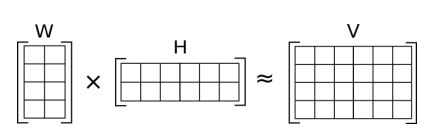

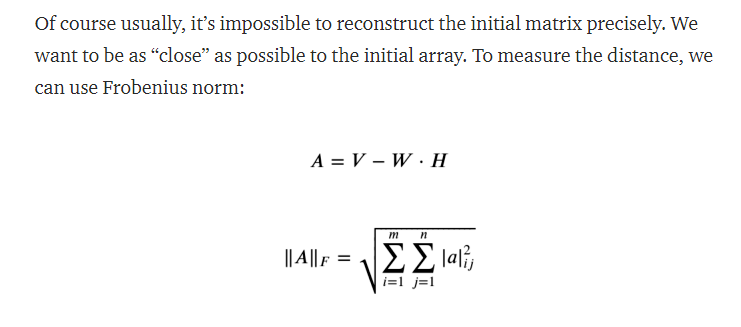

(SVD is the theoritical counter-part to NMF that provides exact W and H)

In [ ]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0,tol=5e-3)
W = model.fit_transform(X)
W

In [ ]:
H = model.components_
H

In [ ]:
X_new = np.array([[1, 0], [1, 6.1], [1, 0], [1, 4], [3.2, 1], [0, 4]])
W_new = model.transform(X_new)
W_new

In [ ]:
# updated the schematics on draw.io 
# how to fill recommendation 
# for missing values https://github.com/scikit-learn/scikit-learn/pull/8474 found in https://stackoverflow.com/questions/39367597/how-to-deal-with-missing-values-in-python-scikit-nmf
# Have Run-Debug tests
# add Dags
    #https://www.youtube.com/watch?v=s-r2gEr7YW4&t=517s
# add a UI
        #in jupyter notebook with widgets https://www.youtube.com/watch?v=eyEabQRBMQA
        #using StreamLit
        #using a game development library with ready UI components https://www.pygame.org/docs/search.html?q=rotation+an+image
                 # got from here https://analyticsindiamag.com/top-9-python-frameworks-for-game-development/